Задание №1

 На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg



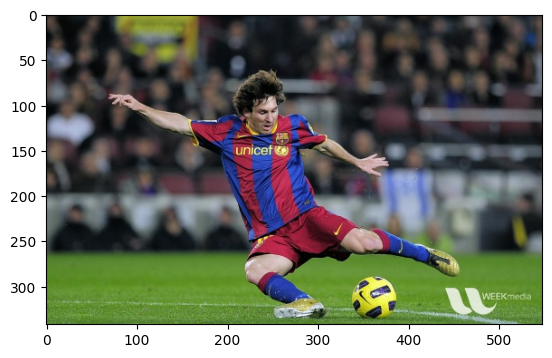

In [30]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, pi

img = cv.imread('messi5.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

(342, 548, 3)


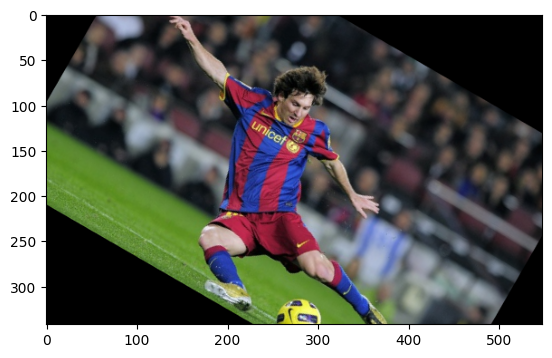

In [31]:
height, width = img.shape[:2]
angle = 30 * np.pi / 180

translation_before = np.float32([[1, 0, -width / 2],
                                 [0, 1, -height / 2],
                                 [0, 0, 1]])

rotation = np.float32([[np.cos(angle), -np.sin(angle), 0],
                      [np.sin(angle), np.cos(angle), 0],
                      [0, 0, 1]])

translation_after = np.float32([[1, 0, width / 2],
                                [0, 1, height / 2],
                                [0, 0, 1]])

combined_transform = translation_after @ rotation @ translation_before
img_res = cv.warpAffine(img, combined_transform[0:2], (width, height))

plt.imshow(img_res)
print(img_res.shape)


Задание №2

В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).


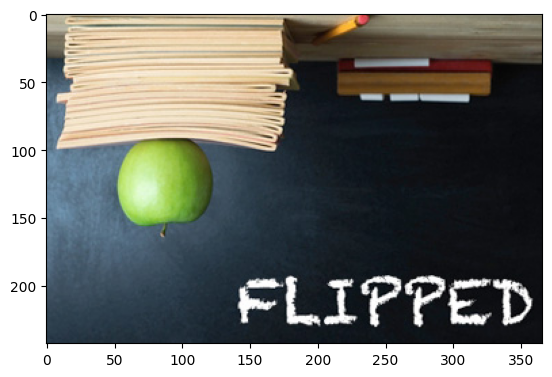

In [32]:
apple = cv.imread('apple.jpg')
apple = cv.cvtColor(apple, cv.COLOR_BGR2RGB)
plt.imshow(apple)

(243, 366, 3)


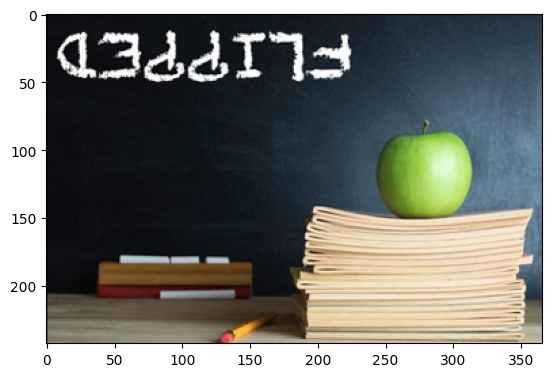

In [33]:
height, width = apple.shape[:2]
angle_180_degrees = 180 * np.pi / 180
tx = -width / 2
ty = -height / 2

rotation_180 = np.float32([[np.cos(angle_180_degrees), -np.sin(angle_180_degrees), 0],
                           [np.sin(angle_180_degrees), np.cos(angle_180_degrees), 0],
                           [0, 0, 1]])

translation_before = np.float32([[1, 0, tx],
                                 [0, 1, ty],
                                 [0, 0, 1]])

translation_after = np.float32([[1, 0, -tx],
                                [0, 1, -ty],
                                [0, 0, 1]])

combined_transform_180 = translation_after @ rotation_180 @ translation_before
img_res = cv.warpAffine(apple, combined_transform_180[0:2], (width, height))

plt.imshow(img_res)
print(img_res.shape)


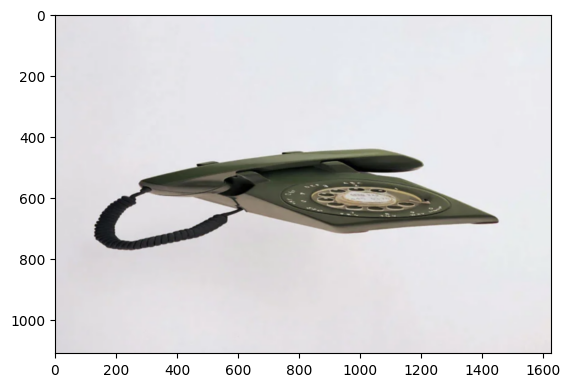

In [34]:
phone = cv.imread('phone.png')
phone = cv.cvtColor(phone, cv.COLOR_BGR2RGB)
plt.imshow(phone)

(333, 162, 3)


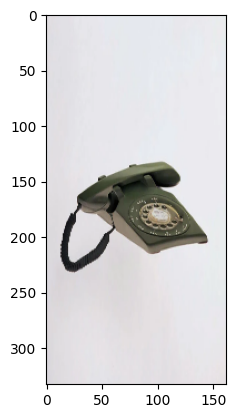

In [35]:
height, width = phone.shape[:2]
scaling_matrix = np.float32([
    [0.1, 0, 0],
    [0, 0.3, 0],
])

scaled_width = int(width * 0.1)
scaled_height = int(height * 0.3)

img_res_scaled = cv.warpAffine(phone, scaling_matrix, (scaled_width, scaled_height))

plt.imshow(img_res_scaled)
print(img_res_scaled.shape)

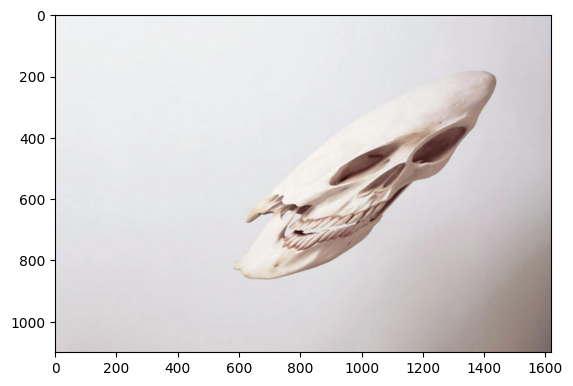

In [36]:
skull = cv.imread('skull.png')
skull = cv.cvtColor(skull, cv.COLOR_BGR2RGB)
plt.imshow(skull)

(450, 400, 3)


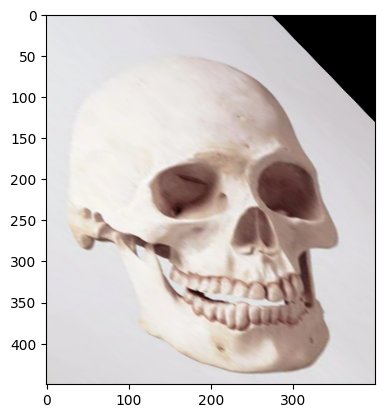

In [37]:
height, width = skull.shape[:2]
angle_30_degrees = -30 * np.pi / 180
tx = -width / 2
ty = -height / 2

rotation_30 = np.float32([[np.cos(angle_30_degrees), -np.sin(angle_30_degrees), 0],
                          [np.sin(angle_30_degrees), np.cos(angle_30_degrees), 0],
                          [0, 0, 1]])

translation_before = np.float32([[1, 0, tx],
                                 [0, 1, ty],
                                 [0, 0, 1]])

translation_after = np.float32([[1, 0, -tx],
                                [0, 1, -ty],
                                [0, 0, 1]])

scaling_matrix = np.float32([
    [0.5, 0.25, 0],
    [0.5, 1, 0],
    [0, 0, 1]
])

translation_matrix = np.float32([
    [1, 0, -700],
    [0, 1, -810],
    [0, 0, 1]
])

combined_transform = translation_matrix @ translation_after @ rotation_30 @ translation_before @ scaling_matrix

img_res = cv.warpAffine(skull, combined_transform[0:2], ((int)(400), int(450)))

plt.imshow(img_res)
print(img_res.shape)

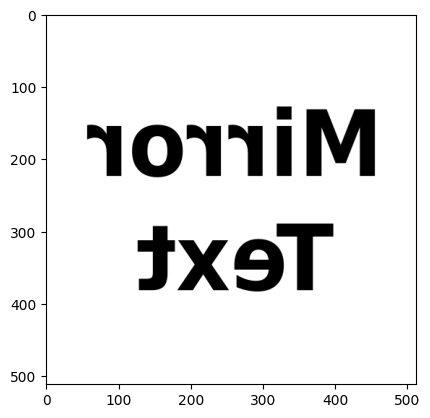

In [38]:
text = cv.imread('text.png')
skull = cv.cvtColor(text, cv.COLOR_BGR2RGB)
plt.imshow(text)


(512, 512, 3)


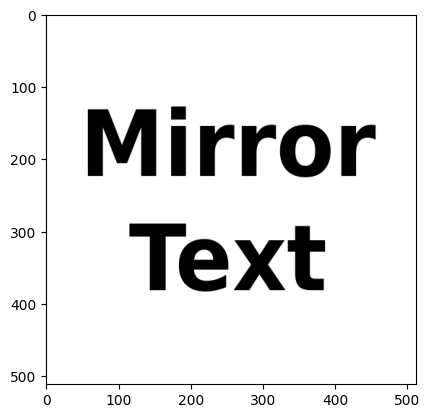

In [39]:
height, width = text.shape[:2]
mirroring_matrix = np.float32([
    [-1, 0, width],
    [0, 1, 0],
])

img_res_mirrored = cv.warpAffine(text, mirroring_matrix, (width, height))

plt.imshow(img_res_mirrored)
print(img_res_mirrored.shape)